# Week 4, session 1

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, colors
from scipy.stats import norm
from scipy import special
from scipy.stats import multivariate_normal
from ipywidgets import interact,FloatSlider
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['font.size'] = 16
np.set_printoptions(precision=3)

# 1) Multivariate normal distribution


In $d$ dimensions, the multivariate normal probability density function is given by

$$\mathcal{N}(\mathbf{x}; \mathbf{\mu},\mathbf{\Sigma}) = \frac{1}{ \sqrt{ (2\pi)^d |\mathbf{\Sigma}|}}\exp\left( -\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x}-\mathbf{\mu}) \right)$$

where $\mathbf{\mu}$ is a $d$-dimensional vector, $\mathbf{\Sigma}$ is the $d\times d$ covariance matrix and $|\mathbf{\Sigma}|$ is the determinant of $\mathbf{\Sigma}$.

We consider sampling in two dimensions, such that a sample is given by two values $\mathbf{x} = (x_1,x_2)$, with $(\mu_1,\mu_2)$ representing the means and $(\sigma^2_1,\sigma^2_2)$ representing the variances in the respective dimensions.

Now consider the case where the two components are correlated, such that there is a trend that whenever $x_1$ is larger than $\mu_1$, then $x_2$ tends to also be larger than $\mu_2$. And whenever $x_1$ is smaller than $\mu_1$ then $x_2$ tends to be smaller than $\mu_2$.  



In this case we cannot sample from two independent normal distributions, as they cannot describe the covariance between components. Instead, let $\mathbf{x}$ be a 2-dimensional (multivariate) normal distribution given by a mean, $\mathbf{\mu} = (\mu_1, \mu_2)$ and covariance matrix $\mathbf{\Sigma}$.


The covariance between components can be computed as, $\text{cov}[x_1,x_2] \equiv \mathbb{E}[(x_1 - \mu_1)(x_2-\mu_2)]$. The covariance matrix is then given by

$$\mathbf{\Sigma} = \begin{bmatrix}\sigma^2_{1} & \text{cov}[x_1,x_2]\\ \text{cov}[x_2,x_1] &\sigma^2_{2}\end{bmatrix}= \begin{bmatrix}\sigma_{11} &\sigma_{12}\\ \sigma_{21} &\sigma_{22}\end{bmatrix}.$$


The terms $\sigma_{21}$ and $\sigma_{12}$ must be equal as they describe the covariance between the same components. The covariance matrix is hence always symmetric.

In the following questions, let $\mu_1 = 5, \mu_2 = 20, \sigma^2_1 = 2, \sigma^2_2 = 5$ and set the covariance to $\sigma_{12} = \sigma_{21} = 2.5$.

### Questions

$\star$ The code below should generate a dataset with $N = 10000$ samples from the 2-dimensional normal $X\sim\mathcal{N}(\mathbf{\mu},\Sigma)$. Fill in the missing values for the parameters of the multivariate normal distribution.

$\star$ Use np.mean and np.cov to compute the sample mean and sample covariance matrix for the data. Compare with $\mathbf{\mu}$ and $\Sigma$ and comment on the results when varying $N$.

$\star$ Inspect the plotting code below and explain what it does. 

### Hints

$\bullet$ You can draw from the multivariate normal distribution using the numpy function np.random.multivariate_normal



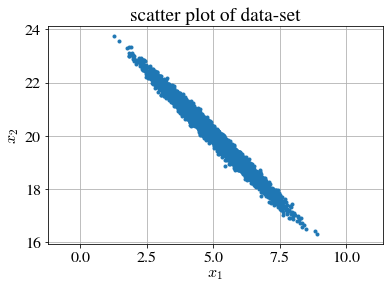

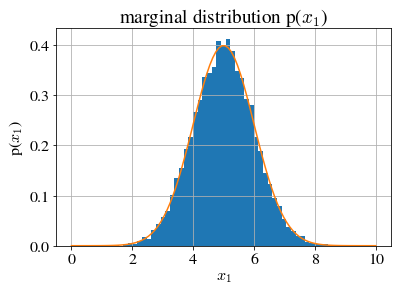

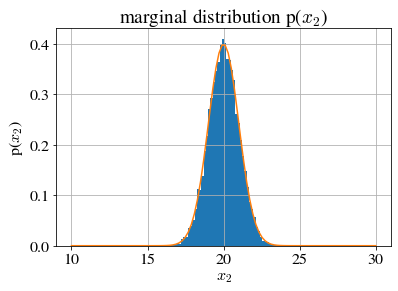

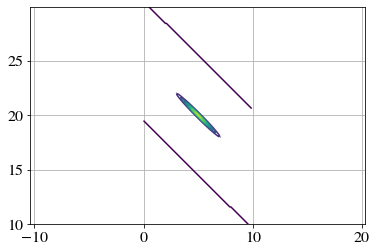

In [34]:
#true mean values
mu1 = 5
mu2 = 20
mu = np.array([mu1,mu2])

#true covariance
sigma1 = 1
sigma2 = 1
sigma12 = sigma21 = -0.99
SIGMA = np.array([[sigma1, sigma12], [sigma21, sigma2]]) 

#number of samples
N = 10000

#draw samples from the distribution
data = np.random.multivariate_normal(mu,SIGMA,N)
xdata = data[:,0];
ydata = data[:,1];

#plot 2D-scatter of data
plt.plot(xdata,ydata,'.');
plt.axis('equal');
plt.title('scatter plot of data-set');
plt.xlabel(r'$x_1$');
plt.ylabel(r'$x_2$');
plt.show();

#plot histogram of the marginals  
x1 = np.linspace(0,10, 100)
count, bins, ignored = plt.hist(xdata, 50, density = True);
plt.plot(x1,norm.pdf(x1,mu1,np.sqrt(sigma1)));
plt.title(r'marginal distribution p($x_1$)');
plt.xlabel(r'$x_1$');
plt.ylabel(r'p($x_1$)');
plt.show();

x2 = np.linspace(10,30, 100)
count, bins, ignored = plt.hist(ydata, 50, density = True);
plt.plot(x2,norm.pdf(x2,mu2,np.sqrt(sigma2)));
plt.title(r'marginal distribution p($x_2$)');
plt.xlabel(r'$x_2$');
plt.ylabel(r'p($x_2$)');
plt.show();

x, y = np.mgrid[0:10:.1, 10:30:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
multinorm = multivariate_normal([mu1, mu2], [[sigma1, sigma12], [sigma21, sigma2]])
plt.contour(x, y, multinorm.pdf(pos));
plt.grid(True);
plt.axis('equal');

In [15]:
sample_mu1 = np.mean(xdata)
sample_mu2 = np.mean(ydata)

sample_sigma = np.cov(xdata,ydata)


# Interpretation of the covariance

The correlation coefficient, $\rho$, is a quantity for describing the correlation between components. It is defined as the normalized covariance, as
$$ \rho = \dfrac{\text{cov}[x_1,x_2]}{\sqrt{\sigma^2_1\sigma^2_2}}  = \dfrac{\sigma_{12}}{\sqrt{\sigma^2_1\sigma^2_2}}\quad,\qquad \text{where} \rho\in[-1,1]$$

### Questions

$\star$ Use the plotting function to create similar visualizations for the 2-dimensional normal distribution but with different covariance matrices.
- For example, try to fix the variances, $\sigma^2_1$ and $\sigma^2_2$, while only changing the covariance. 
- Comment on how the orientation and shape of the ellipsoids (in the contour plots) depends on the covariance matrix. 
- Can you create a situation where $\rho = 1$ or $\rho = -1$. Comment on the relationship between $x_1$ and $x_2$ as $\rho$ approaches  $1$ or $-1$.


# Marginals and conditionals of the 2D normal

A very convenient property of the 2-dimensional normal distribution is that, when one of the variables $y$ is fixed at a known value $v$,  the conditional probability density function for the other variable $p(x|y=v)$ follows a normal distribution  $p(x|y=v)\sim\mathcal{N}$ $(\mu_{x|y=v}\;,\;\sigma^2_{x|y=v})$.

Here, the conditional mean and variance of $x$ is given by:

$$ \mu_{x|y=v} = \mu_{x} + \rho \sigma_x \dfrac{v - \mu_y}{\sigma_y}  $$

$$ \sigma_{x|y=v} = \sigma_x \sqrt{1-\rho^2} $$

***Question***

$\star$ Inspect the function given below and explain the figures

In [35]:

def plotCondition(v,cov):    

    #define means, variances and covariance matrix
    mu_x = 0;
    mu_y = 0;

    sigma_xx = 1
    sigma_yy = 1
    sigma_xy = cov
    SIGMA = [ [sigma_xx, sigma_xy],[sigma_xy, sigma_yy]]  

    #compute correlation coefficient and conditional mean and variance
    rho = cov/(sigma_xx*sigma_yy)
    print('correlation coefficient = ',rho)
    mu_ = mu_x+rho*(v-mu_y)/sigma_yy
    sigma_ = sigma_xx*np.sqrt(1-rho*rho)

    #plot contour of p(x,y) and y = v as a line
    plt.figure(figsize=(10,10))
    x1 = np.linspace(-10,10, 100)
    ax1 = plt.subplot(221)
    x, y = np.meshgrid(x1,x1)
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    multinorm = multivariate_normal([mu_x, mu_y], SIGMA)
    plt.contour(x, y, multinorm.pdf(pos),levels=np.logspace(-10,-1,10), cmap='RdBu_r',norm=colors.LogNorm())
    plt.hlines(v, -8,8, colors='k', linestyles='dashed', label = 'y=v')
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.ylabel('y')
    plt.legend()
    plt.axis([-10,10,-10,10])
    plt.axis('equal')
    plt.grid(True)

    #plot the marginal, p(x), and conditional, p(x|y=v) 
    ax2 = plt.subplot(223)
    
    h = plt.plot(x1,norm.pdf(x1,mu_,sigma_), label = 'p(x|y=v)')
    plt.vlines(mu_,0,norm.pdf(mu_,mu_,sigma_),color=h[0].get_color(),alpha=0.5)
    h = plt.plot(x1,norm.pdf(x1,mu_x,sigma_xx), label = 'p(x)');
    plt.vlines(mu_x,0,norm.pdf(mu_x,mu_x,sigma_xx),color=h[0].get_color(),alpha=0.5)
    
    plt.scatter(v,0,color='k',marker='o',label='v',zorder=10,s=80)
    plt.ylim(0,0.9)
    plt.xlabel('x')
    plt.ylabel('density')
    plt.legend()
    plt.grid(True)

    
    ax3 = plt.subplot(222)
    covs = np.linspace(-1,1,100)[1:-1]
    plt.plot(covs,covs*v)
    plt.scatter(cov,cov*v,color='k')
    plt.hlines(v,-1,1,color='k',linestyle='--')
    plt.xlabel(r'$\rho$')
    plt.ylabel('mean of $p(x|y=v)$')
    plt.axis([-1,1,-5,5])
    ax4 = plt.subplot(224)
    covs = np.linspace(-1,1,100)[1:-1]
    plt.plot(covs,np.sqrt(1-np.square(covs)))
    plt.scatter(cov,np.sqrt(1-np.square(cov)),color='k')
    plt.xlabel(r'${\rho}$')
    plt.ylabel('standard deviation of $p(x|y=v)$')
    plt.axis([-1,1,0,1.1])
    
interact(plotCondition, 
    v=FloatSlider(min = -5.0, max = 5.0, value = 0, continuous_update=False),
    cov = FloatSlider(min = -.9, max = .9, value = 0, continuous_update = False),

);  




interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='v', max=5.0, min=-5.0), Flo…

# 2D Principal component analysis 

In the lecture, we showed that by projecting all datavectors $\mathbf{x}_j$ on a generic (non-specific) unit vector $\mathbf{u}$, i.e.

$$\alpha_j = \mathbf{u}^\top \mathbf{x}_j$$

we could find the variance $\sigma_{\alpha}^2$ of these projections (referred to as projection variance) as given by

$$\sigma_{\alpha}^2 = \frac{1}{N-1}\sum_{j=1}^N (\alpha_j- \mu_{\alpha})^2$$

where $\mu_{\alpha} = \frac{1}{N}\sum_{j=1}^N \alpha_j$. The question was then: "which unit vector gives the largest projected variance?" We derived the answer using constrained optimization techniques, and found the solution

$$\mathbf{\Sigma} \mathbf{u}_1 = \lambda_1\mathbf{u}_1$$

where $\mathbf{\Sigma}$ is the covariance matrix of the data (which we just learned how to calculate in the above exercises) and $\lambda_1$ is the largest eigenvalue of $\mathbf{\Sigma}$. We can even generalize this to say the unit vector $\mathbf{u}_i$ is the direction with the $i$'th most variance, insofar $\lambda_1 \geq \lambda_2 \geq...\lambda_i \geq...\geq\lambda_M$ is met.


### Finding the largest projected variance
We shall now try to numerically arrive at the conclusion we just made: that $\mathbf{u}_1$ is the eigenvector of $\mathbf{\Sigma}$ with the largest eigenvalue $\lambda_1$. We will simply try out a buch of different $\mathbf{u}$'s, plot the projected variance and see when this has it's maximum.


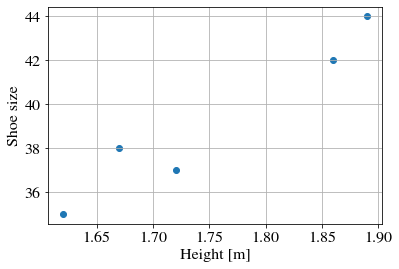

In [36]:
# Defining the height / shoe size dataset:
X = np.array([[1.72,37],\
                [1.86,42],\
                [1.89,44],\
                [1.62,35],\
                [1.67,38]])
# Plot dataset
plt.scatter(X[:,0],X[:,1]); plt.xlabel("Height [m]"); plt.ylabel("Shoe size");

### 0. Try changing $\mathbf{u}$ by varying $v$ in the script beneath. The beneath calculates and plots the unit vector from $v$.

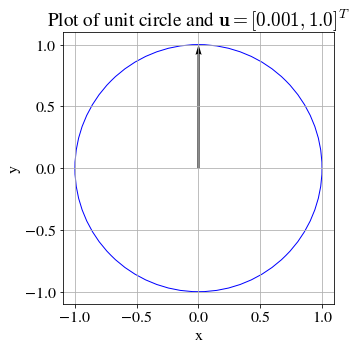

In [38]:
# Define unit vector
def get_u(v):
    return np.array([np.cos(v),np.sin(v)])
v = 3.14/2   # play around with this angle (in radian). Remeber pi= 3.14
u = get_u(v)

# Plot unit vector
def plot_vector(u,origin=[0,0]):
    ax = plt.gca()
    ax.cla()    
    circle = plt.Circle((0, 0), 1, color='b', fill=False)
    plt.quiver(origin[0], origin[1], u[0], u[1], angles='xy', scale_units='xy', scale=1)
    ax.add_patch(circle)
    plt.xlabel("x");plt.ylabel("y");
    plt.title(r"Plot of unit circle and $\mathbf{u}=["+str(np.round(u[0],3))+","+str(np.round(u[1],3))+"]^T$")
    plt.axis('scaled')

f = plt.figure(figsize=(5,5))
plot_vector(u)
plt.show()

### 1. Modify the function "inner_product" to calculate the inner product between two vectors. The function checks if your answer is equal to numpys implementation "np.inner(u,x)", i.e. you should not use np.inner(u,x) directly --- you should write your own code (np.sum, np.multiply, etc. is OK but not methods that directly calculates the inner product).

In [42]:
def inner_product(u,x):
    inner_ = np.sum(np.multiply(u,x))
    assert inner_ == np.inner(u,x)
    return inner_


# This function loops through all datapoints and calculates the inner product (alpha):
def get_projection_mean_and_variance(u,X,print_each=False):
    alphas  = []
    for j,x_ in enumerate(X):
        alpha = inner_product(u,x_)
        alphas.append(alpha)
        if print_each:
            print("alpha_{} = u^T x_{} = {:.2f}".format(j+1,j+1,alpha))

    # Calculate the projected mean and variance:
    mu_alpha = np.mean(alphas)
    var_alpha = np.var(alphas)
    return mu_alpha,var_alpha

# An example:
v       = np.pi  
u       = get_u(v)
mu_alpha,var_alpha = get_projection_mean_and_variance(u,X,print_each=True)
print("mu_alpha={:.2f} and var_alpha={:.2f}".format(mu_alpha,var_alpha))

alpha_1 = u^T x_1 = -1.72
alpha_2 = u^T x_2 = -1.86
alpha_3 = u^T x_3 = -1.89
alpha_4 = u^T x_4 = -1.62
alpha_5 = u^T x_5 = -1.67
mu_alpha=-1.75 and var_alpha=0.01


### 2. Write code which tries a bunch of different angles $v$ in the interval $[0;2\pi]$ and for each of these calculates the projection variance. We have written code which will plot all of these variances with respect to $v$: 

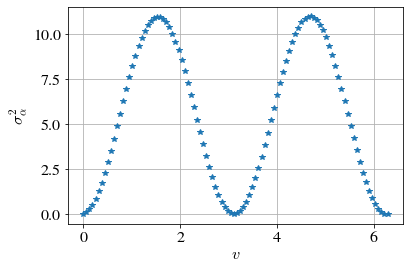

In [43]:
angles      = np.linspace(0,2*np.pi,100)
alpha_vars  = []
lambda_1    = 0 # largest variance will be saved in this
u_1         = 0 # corresponding unit vector for largest variance will be saved in this
v_1         = 0 # corresponding angle for the above unit vector will be saved in this

# Trying out a bunch of different angles
for v in angles:
    u       = get_u(v)
    _, var_alpha = get_projection_mean_and_variance(u,X,print_each=False)
    alpha_vars.append(var_alpha)
    
    if lambda_1 < var_alpha:
        lambda_1    = var_alpha
        u_1         = u
        v_1         = v

plt.plot(angles,alpha_vars,"*"); plt.xlabel(r"$v$"); plt.ylabel(r"$\sigma^2_{\alpha}$");

### 3. We observe two peaks i.e. two solutions when the projected variance has it's max. The script beneath plots both solutions --- does these solutions make sense? Why? Hint: the distance between the two peaks is exactly $\pi$.

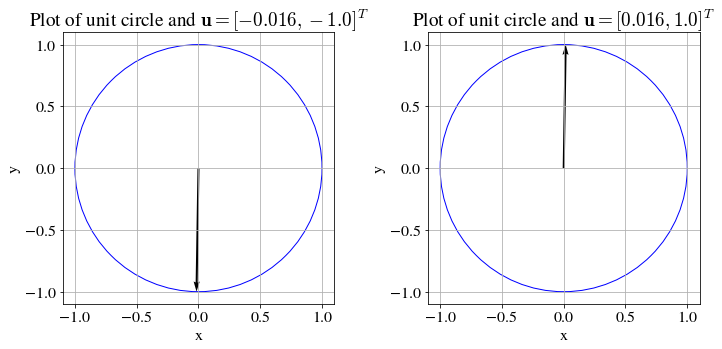

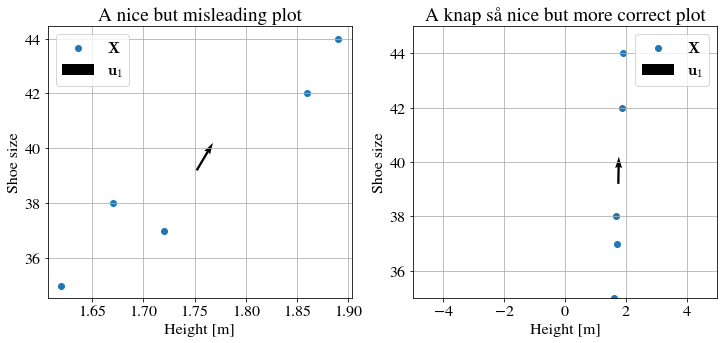

In [44]:
u_a = get_u(v_1)
u_b = get_u(v_1+np.pi) # the distance between the two peaks is exactly pi
f = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_vector(u_a)
plt.subplot(1,2,2)
plot_vector(u_b)
plt.show()

f = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax = plt.gca()
ax.cla()    
plt.scatter(X[:,0],X[:,1],label=r"$\mathbf{X}$"); plt.xlabel("Height [m]"); plt.ylabel("Shoe size"); 
plt.quiver(np.mean(X[:,0]), np.mean(X[:,1]), u_b[0], u_b[1], angles='xy', scale_units='xy', scale=1,label=r"$\mathbf{u}_1$")
plt.title("A nice but misleading plot")
plt.legend()

plt.subplot(1,2,2)
ax = plt.gca()
ax.cla()    
plt.scatter(X[:,0],X[:,1],label=r"$\mathbf{X}$"); plt.xlabel("Height [m]"); plt.ylabel("Shoe size"); 
plt.quiver(np.mean(X[:,0]), np.mean(X[:,1]), u_b[0], u_b[1], angles='xy', scale_units='xy', scale=1,label=r"$\mathbf{u}_1$")
plt.xlim([-5,5])
plt.ylim([35,45])
plt.title("A knap så nice but more correct plot")
plt.legend()
plt.show()




What are the first principal component driven by? Is this an interesting direction?

### A super important thing when using PCA

"Always, always, always standardize data before doing PCA" - Jesus Christ.


Why are Jesus right about this? Hint: what does PCA find?


The code beneath calculates the standardized dataset and plots 1) a scatter plot of this new data and 2) runs through a bunch of angles and plots the projection variance. We shall denote the standardized version of the vector $\mathbf{x}_j$ as $\tilde{\mathbf{x}}_j$

$$ \tilde{\mathbf{x}}_j = \frac{\mathbf{x}_j-\mu}{\sigma} $$

i.e subtract the mean and divide with the standard deviation. Let's do that:

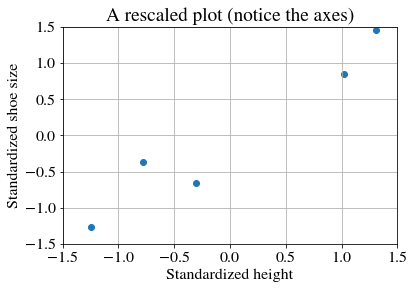

In [46]:
# Standardizing data means subtract mean and divide with standard deviation. This is done for all variables (columns) in X:
X_tilde = (X - np.mean(X,axis=0))/np.std(X,axis=0)
# Plot scatter plot of dataset
plt.scatter(X_tilde[:,0],X_tilde[:,1]); 
plt.xlabel("Standardized height"); plt.ylabel("Standardized shoe size"); 
plt.title("A rescaled plot (notice the axes)")
plt.xlim([-1.5,1.5]);plt.ylim([-1.5,1.5]);
plt.show()

### 4. Run the code beneath and notice how we obtain different solutions to $\mathbf{u}_1$ than before in the non-standardized case. Make sure you understand why we get a different solution than before. The code also plots this unit vector in the standardized dataspace. 

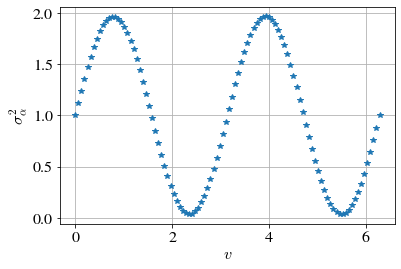

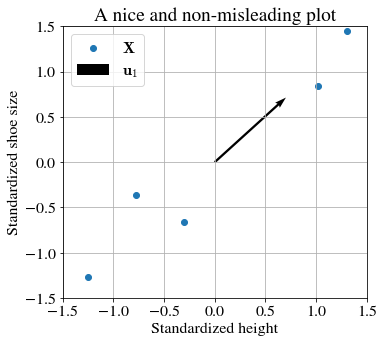

In [48]:
# Run the same algorithm, trying out different angles:
angles      = np.linspace(0,2*np.pi,100)
alpha_vars  = []
lambda_1    = 0 # largest variance will be saved in this
u_1         = 0 # corresponding unit vector for largest variance will be saved in this
v_1         = 0 # corresponding angle for largest variance will be saved in this
for v in angles:
    u       = get_u(v)
    _,var_alpha = get_projection_mean_and_variance(u,X_tilde)
    alpha_vars.append(var_alpha)
    
    if lambda_1 < var_alpha:
        lambda_1    = var_alpha
        u_1         = u
        v_1         = v
plt.plot(angles,alpha_vars,"*"); plt.xlabel(r"$v$"); plt.ylabel(r"$\sigma^2_{\alpha}$");
plt.show()

# Plot first principal component
u_1 = get_u(v_1+np.pi)
f = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax = plt.gca()
ax.cla()    
plt.scatter(X_tilde[:,0],X_tilde[:,1],label=r"$\mathbf{X}$"); plt.xlabel("Standardized height"); plt.ylabel("Standardized shoe size"); 
plt.quiver(0, 0, u_1[0], u_1[1], angles='xy', scale_units='xy', scale=1,label=r"$\mathbf{u}_1$")
plt.title("A nice and non-misleading plot")
plt.legend();
plt.xlim([-1.5,1.5]);plt.ylim([-1.5,1.5]);
plt.show()

### 5. Find and plot the second principle component $\mathbf{u}_2$. You should be able to calculate it from $v_1$

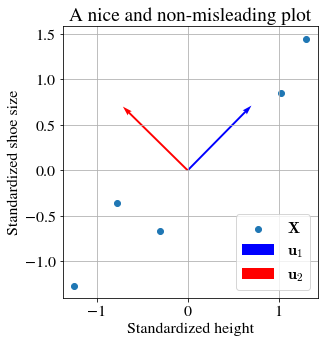

In [52]:
# Plot first principal component
u_1 = get_u(v_1+np.pi)
u_2 = get_u(v_1+3/2*np.pi)
f = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax = plt.gca()
ax.cla()    
plt.scatter(X_tilde[:,0],X_tilde[:,1],label=r"$\mathbf{X}$"); plt.xlabel("Standardized height"); plt.ylabel("Standardized shoe size"); 
plt.quiver(0, 0, u_1[0], u_1[1], color=["b"], angles='xy', scale_units='xy', scale=1,label=r"$\mathbf{u}_1$")
plt.quiver(0, 0, u_2[0], u_2[1], color=["r"],angles='xy', scale_units='xy', scale=1,label=r"$\mathbf{u}_2$")
plt.title("A nice and non-misleading plot")
plt.legend(loc=4);
plt.axis('scaled') # important for angle to be 90 degrees
plt.show()

### 5. What does this first eigenvector in this height / shoe size example reveal? What "feature" about a person does it explain?

It mean they are positivly correlated

# Projection on Eigenvectors

In some cases, it is often useful to consider the measured data in a lower dimension than the apparent dimension of the data vector. For example, imagine a data-set of a 3-dimensional variable. If all the data are on a straight line, the true dimension of the data is only 1D. If the data-set is transformed to a coordinate system, where the variation of the data is along one of the axes, the two other components can be ignored, as the variation of the original signal can be described by the single component.

Let $\lambda_1,\ldots,\lambda_M$ be the ordered set of eigenvalues of the covariance matrix, such that $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_M $. If there exists a number $m$, such that $\lambda_i \gg \lambda_j, i = 1,\ldots m$, and $j=m+1,\ldots,M$, then the data-set can be transformed to a coordinate system, where most of the projected variance is in an $m$-dimensional linear subspace spanned by the $m$'th first eigenvectors in the ordered list. This transformation is again given by the eigenvectors of the covariance matrix :

$$  \mathbf{z}_i = \mathbf{V}^{\top}\tilde{\mathbf{x}}_i. $$

where the columns of $\mathbf{V}$ are the eigenvectors $\mathbf{u}_1,\mathbf{u}_2,...,\mathbf{u}_M$ sorted according to their corresponding eigenvalue. If we extract only the first $m$ components of $\mathbf{z}_i$ we obtain a dataset that carries most of the variation of the original data. Such reduction of the effective dimensionlity of the problem is also known as  "feature extraction".



### Questions 

In this exercise you will visualize the dimensionality reduction for a 2D classification problem.

Consider all data points as pairs $(x_1,x_2)$ in the the datavector $\mathbf{x}$ generated randomly from the two classes $C_1$ and $C_2$, with prior probabilities $P(C_1) = P(C_2) = 0.5$.

Let samples from $C_1$ be based on a 2D normal distribution with parameters 

$$ \mathbf{\mu} = (1.6,2.4)^\top\qquad\text{and}\qquad\mathbf{\Sigma} = \begin{bmatrix} 1.2 & 1\\ 1 &4\end{bmatrix},$$

and let samples from $C_2$ be based on a 2D normal distribution with parameters

$$ \mathbf{\mu} = (-2.2,-3.3)^\top\qquad\text{and}\qquad\mathbf{\Sigma} = \begin{bmatrix} 2 & -1.4\\ -1.4 &2\end{bmatrix},$$


$\star$ Inspect the code below and explain what it does. How does PCA help seperate the two clusters?

$\star$ Repeat the experiment for different distributions. You can also try to change the prior probabilites.

$\star$ Try to create a situation where dimensionality reductions is not feasable.

$\star$ How would you in general decide on an appropriate number of principal components?





Text(0.5, 1.0, '$p(z_2)$')

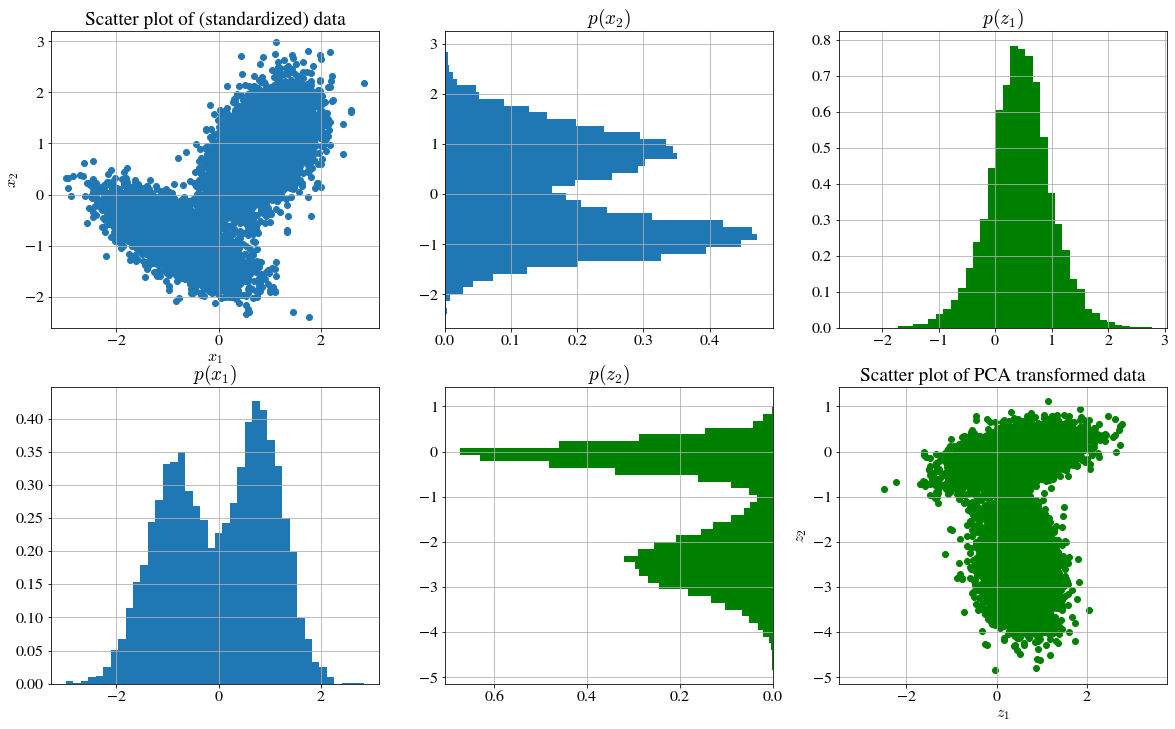

In [53]:
#define means and covariance matrices 
mu1 = [1.6, 2.4]
SIGMA1 = [[1.2, 1],[1, 4]]

mu2 = [-2.2, -3.3] 
SIGMA2 = [[2, -1.4],[-1.4, 2]]

#define prior probabilities for each class
P1 = 0.5
P2 = 1-P1

#number of samples
N = 10000
np.random.seed(0)

#define function to simulate draws from the class conditional distribution
def drawsample():        
    randomdraw = np.random.choice(2, 1, p=[P1,P2])[0]
    sampleClass = randomdraw+1;
    if sampleClass == 1:
        sampleValue = np.random.multivariate_normal(mu1,SIGMA1,1)
    if sampleClass == 2:
        sampleValue = np.random.multivariate_normal(mu2,SIGMA2,1)
    return sampleClass, sampleValue

#draw N samples, based on the prior probabilities for each class
datax = np.zeros(N);
datay = np.zeros(N);
actualclasses = np.zeros(N);
for i in range(N):
    sample_class, sample_value = drawsample();    
    datax[i] = sample_value[0][0];
    datay[i] = sample_value[0][1];
    actualclasses[i] = sample_class;

# Standardize data 
datax   = (datax - np.mean(datax))/np.std(datax)
datay   = (datay - np.mean(datay))/np.std(datay)
data    = np.array((datax,datay))
#compute estimated mean and covariance matrix
mu      = np.mean(data, axis=0)
Sigma   = np.cov(np.array(data))

#draw a scatter plot of the samples as well as histograms for the marginal distributions p(x1) and p(x2)
plt.figure(figsize=(20, 12))
ax1 = plt.subplot(2, 3, 1)
plt.scatter(data[0],data[1])
plt.title('Scatter plot of (standardized) data')
plt.axis('equal')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

ax2 = plt.subplot(2, 3, 4)
plt.hist(datax,40,density=True)
plt.title(r'$p(x_1)$')

plt.subplot(2, 3, 2)
plt.hist(datay,40, orientation="horizontal",density=True)
plt.title(r'$p(x_2)$')


#compute eigenvalues and vectors
W, U = np.linalg.eig(Sigma)

#coordinate transformation 
data_ = np.matmul(U.T,np.array([ datax - mu[0],datay - mu[1]]))
L = np.sqrt(np.linalg.inv(np.diag(W)));

#draw a scatter plot of the transformed samples as well as histograms for the marginal distributions p(x1) and p(x2)
plt.subplot(2, 3, 6)
plt.scatter(data_[0],data_[1], color='g')
plt.title('Scatter plot of PCA transformed data')
plt.axis('equal')
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')

ax3 = plt.subplot(2, 3, 3)
plt.hist(data_[0],40, color='g',density=True)
plt.title(r'$p(z_1)$')

ax5 = plt.subplot(2, 3, 5)
plt.hist(data_[1],40, color='g', orientation="horizontal",density=True)
ax5.invert_xaxis()
plt.title(r'$p(z_2)$')

